<a href="https://colab.research.google.com/github/Marcellinus08/Deep-Learning/blob/main/RNN_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RNN

# Tensorflow

Import dan Persiapan Dataset IMDb

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import numpy as np


In [ ]:
# Load dataset
num_words = 40000
maxlen = 400

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

# Padding
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)


Membuat Model RNN

In [ ]:
def build_rnn_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Embedding(input_dim=num_words, output_dim=128, input_length=maxlen))
    model.add(tf.keras.layers.SimpleRNN(128, return_sequences=True))
    model.add(tf.keras.layers.SimpleRNN(64))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


Melatih Model RNN


In [ ]:
# Build and train the RNN model
model_rnn = build_rnn_model()
history_rnn = model_rnn.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 167s 518ms/step - accuracy: 0.5039 - loss: 0.7299 - val_accuracy: 0.5184 - val_loss: 0.6928
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 183s 458ms/step - accuracy: 0.4994 - loss: 0.7091 - val_accuracy: 0.5086 - val_loss: 0.7039
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 202s 458ms/step - accuracy: 0.5021 - loss: 0.7065 - val_accuracy: 0.4976 - val_loss: 0.6940
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 201s 455ms/step - accuracy: 0.5023 - loss: 0.7016 - val_accuracy: 0.4994 - val_loss: 0.7084
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 203s 457ms/step - accuracy: 0.4960 - loss: 0.7015 - val_accuracy: 0.4938 - val_loss: 0.6946


Evaluasi Model RNN

In [ ]:
def evaluate_model(model, x_test, y_test):
    y_pred_probs = model.predict(x_test)
    y_pred = (y_pred_probs >= 0.5).astype(int)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    f1_squared = f1 ** 2
    auc = roc_auc_score(y_test, y_pred_probs)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"F1 Squared: {f1_squared:.4f}")
    print(f"AUC: {auc:.4f}")

    fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid()
    plt.show()


782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 71ms/step
Accuracy: 0.5000
Precision: 0.5000
Recall: 1.0000
F1 Score: 0.6667
F1 Squared: 0.4444
AUC: 0.5247


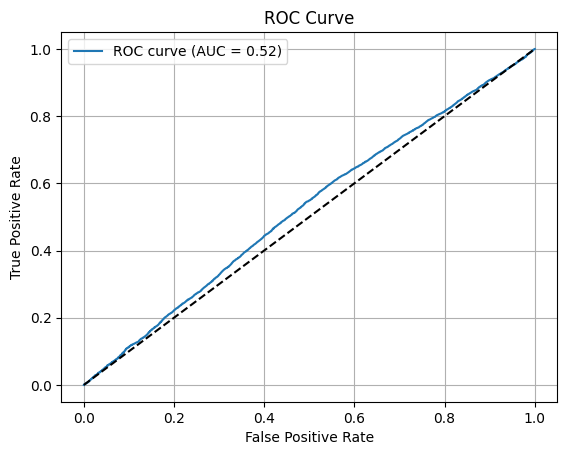

In [ ]:
# Evaluate the RNN model
evaluate_model(model_rnn, x_test, y_test)


Visualisasi Akurasi dan Loss RNN



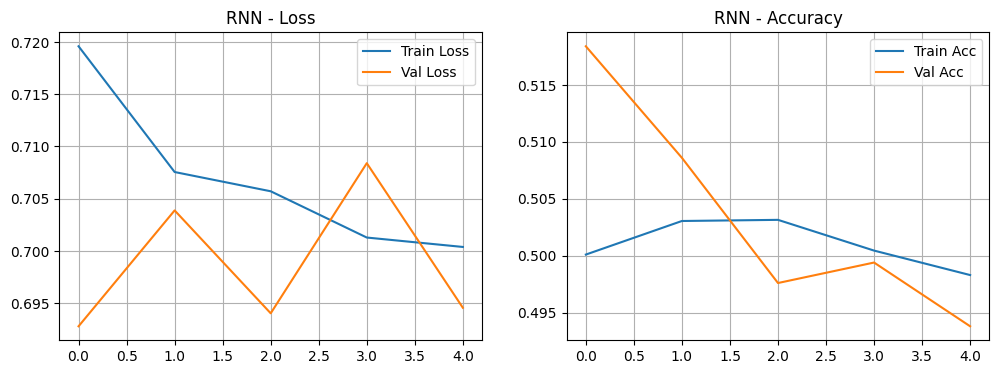

In [ ]:
def plot_history(history, title=''):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{title} - Loss')
    plt.legend()
    plt.grid()

    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(f'{title} - Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

# Plot RNN history
plot_history(history_rnn, title='RNN')


# Pytorch

Import Library & Dataset IMDb

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.nn.utils.rnn import pad_sequence
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

Preprocessing Data IMDb

In [23]:
# Hyperparameters
num_words = 40000
maxlen = 400

# Load IMDb dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

# Padding sequences
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Convert to PyTorch tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.long)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# DataLoader
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)


Membangun Model RNN

In [24]:
class RNNClassifier(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, output_size, num_layers=2):
        super(RNNClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.rnn = nn.RNN(embed_size, hidden_size, num_layers=num_layers, batch_first=True)
        self.dropout = nn.Dropout(0.5)
        self.fc1 = nn.Linear(hidden_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.embedding(x)
        output, hidden = self.rnn(x)
        x = hidden[-1]  # Ambil hidden state terakhir
        x = self.dropout(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return self.sigmoid(x).squeeze()


Training Model

In [25]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = RNNClassifier(vocab_size=num_words, embed_size=128, hidden_size=64, output_size=1).to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [26]:
train_losses = []
val_losses = []

for epoch in range(5):
    model.train()
    epoch_loss = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    avg_loss = epoch_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Epoch {epoch+1} Train Loss: {avg_loss:.4f}")


Epoch 1 Train Loss: 0.6498
Epoch 2 Train Loss: 0.5697
Epoch 3 Train Loss: 0.5205
Epoch 4 Train Loss: 0.4976
Epoch 5 Train Loss: 0.4631


Evaluasi Model

In [27]:
model.eval()
y_true = []
y_probs = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        y_probs.extend(outputs.cpu().numpy())
        y_true.extend(labels.numpy())

y_pred = np.array(y_probs) >= 0.5
y_true = np.array(y_true)


In [28]:
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, zero_division=0)
recall = recall_score(y_true, y_pred, zero_division=0)
f1 = f1_score(y_true, y_pred, zero_division=0)
f1_squared = f1 ** 2
auc = roc_auc_score(y_true, y_probs)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F1 Squared: {f1_squared:.4f}")
print(f"AUC: {auc:.4f}")


Accuracy: 0.7572
Precision: 0.7544
Recall: 0.7626
F1 Score: 0.7585
F1 Squared: 0.5753
AUC: 0.8251


Visualisasi ROC & Training Loss

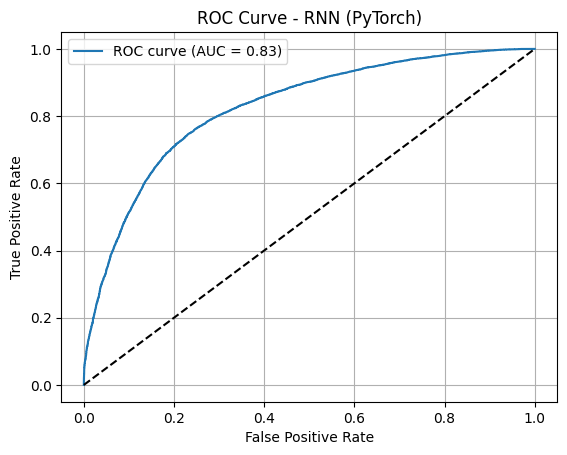

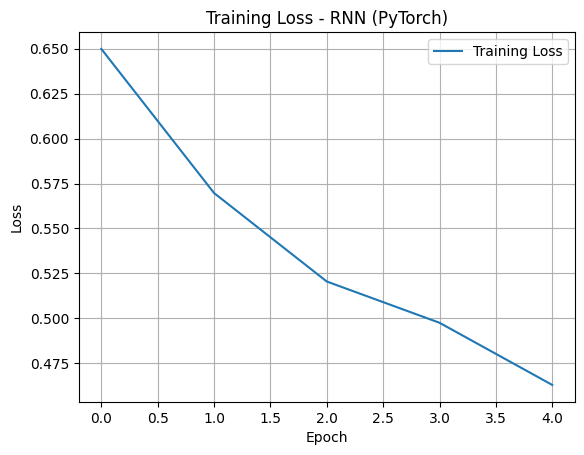

In [29]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_probs)
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - RNN (PyTorch)")
plt.legend()
plt.grid()
plt.show()

# Training Loss
plt.plot(train_losses, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss - RNN (PyTorch)")
plt.grid()
plt.legend()
plt.show()
